DATA HISTORY

Mushroom Hunting: Edible or Poisonous? Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

Attribute Information:

1.cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 2.cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 3.cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 4.bruises?: bruises=t,no=f 5.odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 6.gill-attachment: attached=a,descending=d,free=f,notched=n 7.gill-spacing: close=c,crowded=w,distant=d 8.gill-size: broad=b,narrow=n 9.gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 10.stalk-shape: enlarging=e,tapering=t 11.stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 12.stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 13.stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 14.stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 15.stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 16.veil-type: partial=p,universal=u 17.veil-color: brown=n,orange=o,white=w,yellow=y 18.ring-number: none=n,one=o,two=t 19.ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 20.spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 21.population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 22.habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Goal THIS IS IMPORTANT, THIS IS NOT OUR TYPICAL PREDICTIVE MODEL!

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

IMPORT RELEVANT LIBRARIES

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

READ IN THE DATASET

In [6]:
df = pd.read_csv('mushrooms.csv')

In [7]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


PERFORM EXPLORATORY DATA ANALYSIS

<Axes: xlabel='class', ylabel='count'>

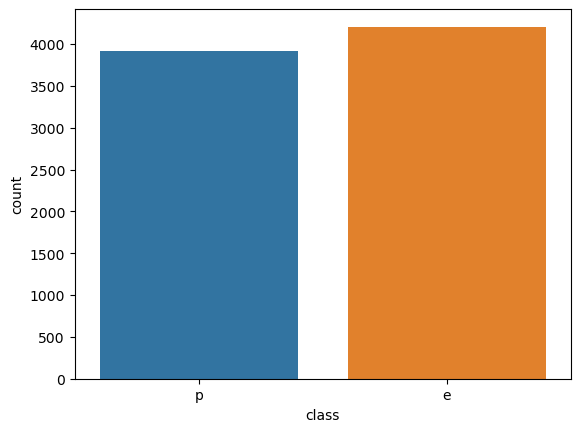

In [8]:
sns.countplot(data=df, x='class')

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
unique_features = df.describe().transpose().reset_index().sort_values('unique')

In [11]:
unique_features

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


<Axes: xlabel='index', ylabel='unique'>

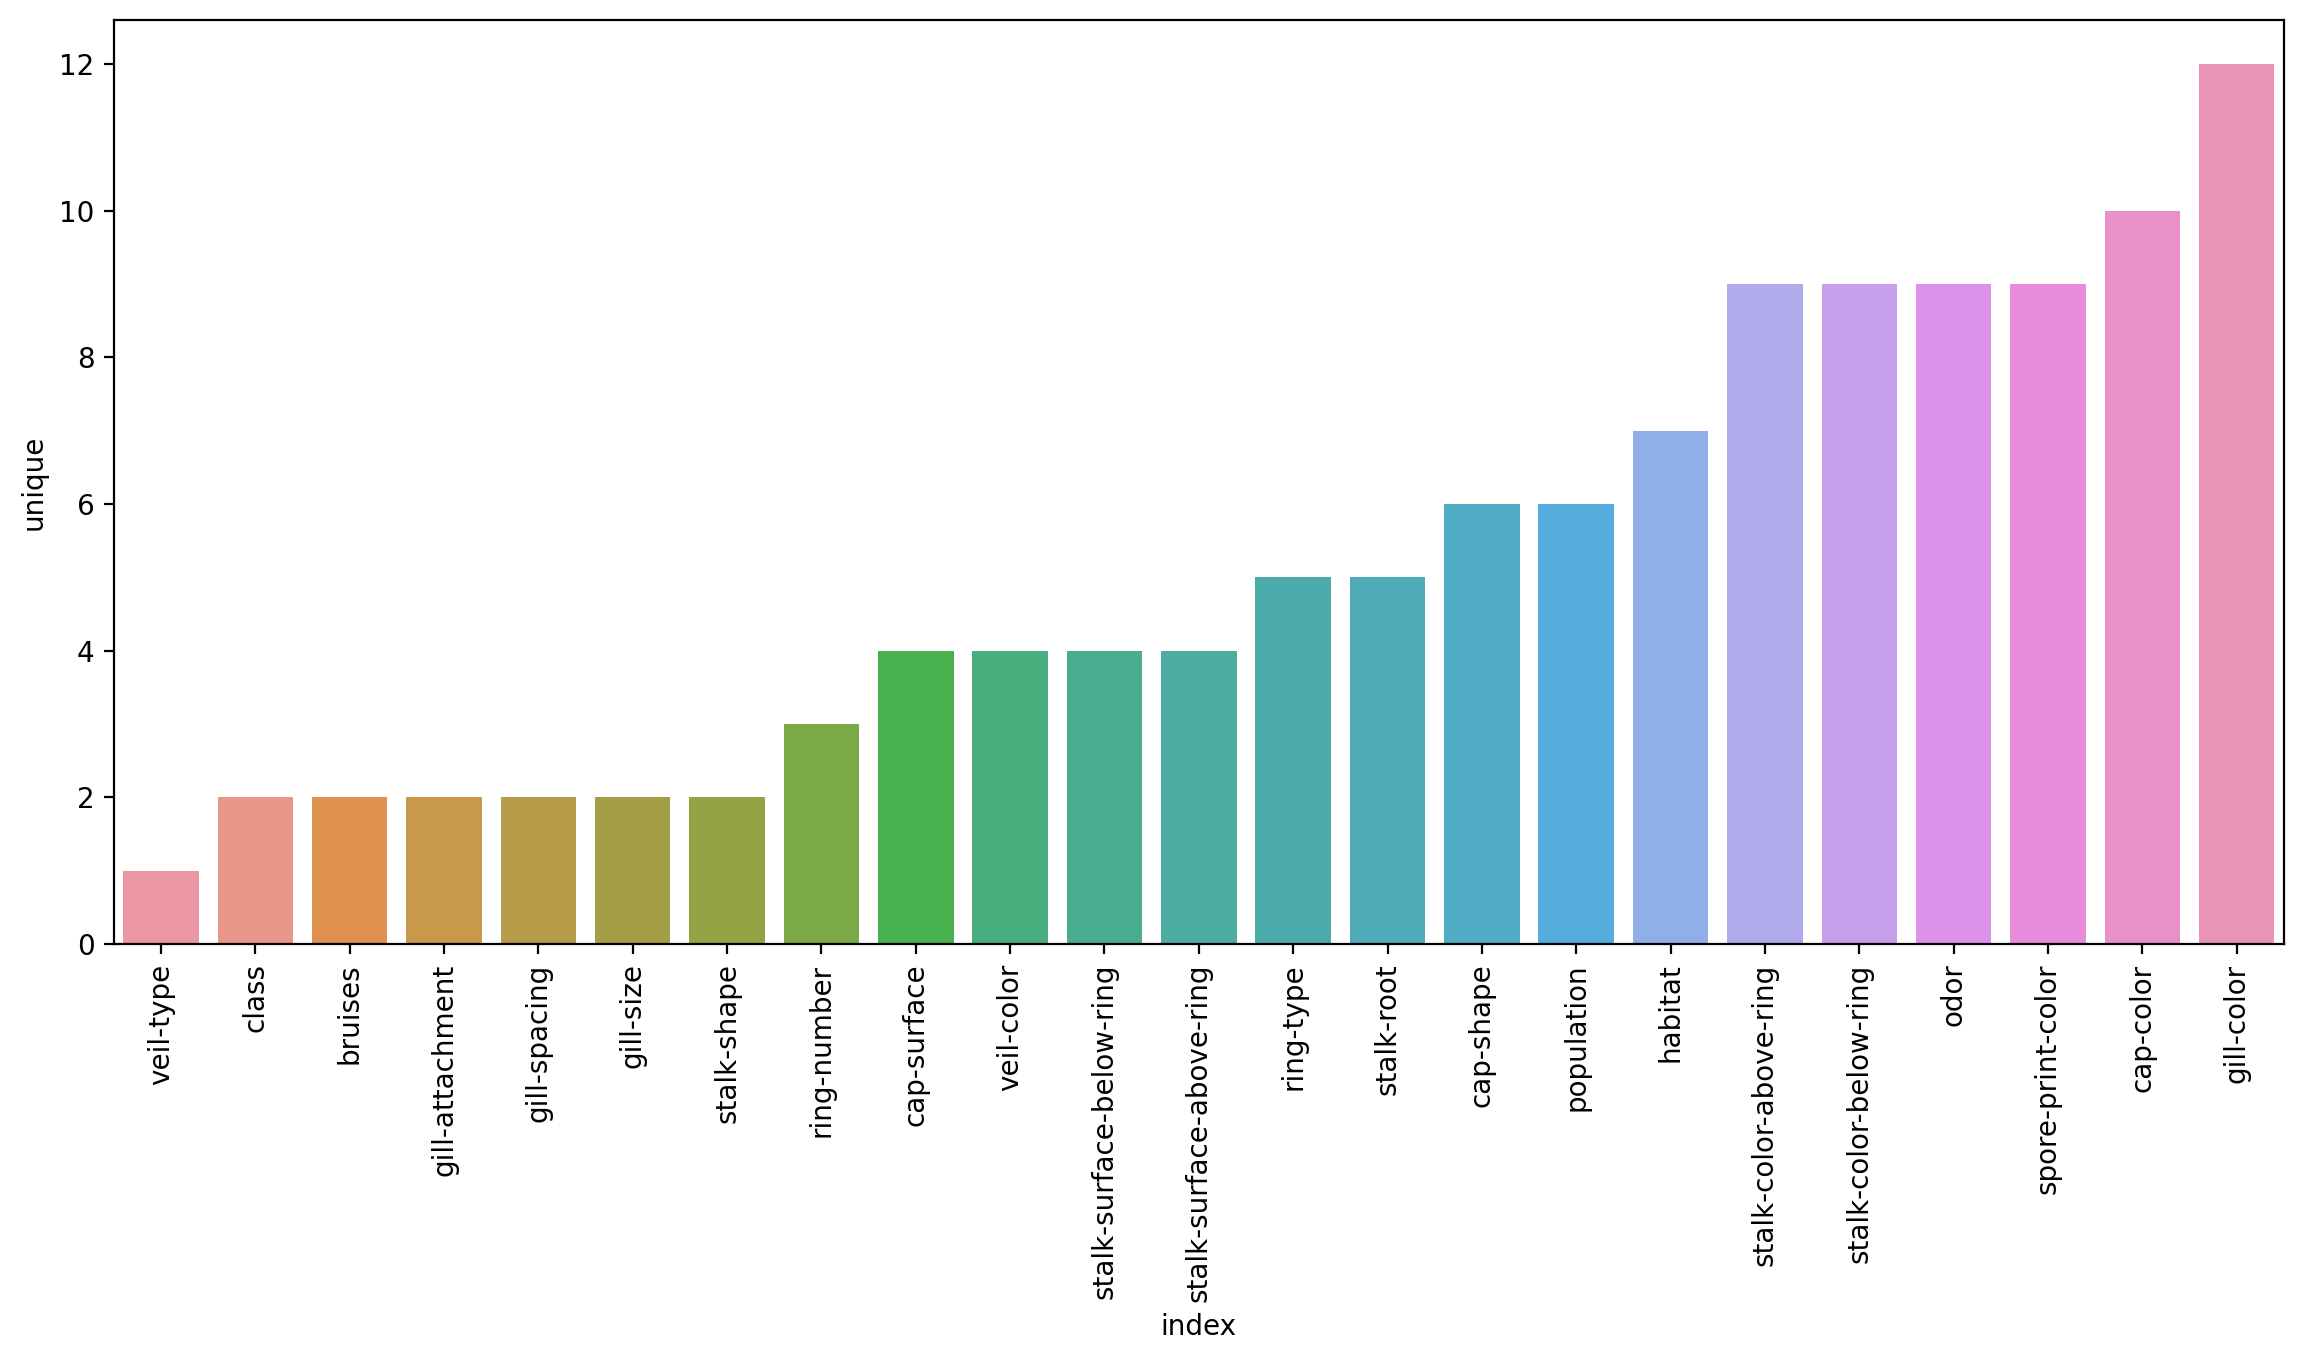

In [12]:
plt.figure(figsize=(14,6), dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=unique_features, x='index', y='unique')

PERFROM FEATURE AND LABEL SPLIT

In [13]:
# checking for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [14]:
X = df.drop('class', axis=1)
y = df['class']

In [15]:
# use dummy to convert categorical data to numerical
X = pd.get_dummies(X, drop_first=True)

In [16]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


PERFORM TRAIN TEST SPLIT

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=101)

CREATE THE GRADIENTBOOST MODEL USING GRIDSEARCH

In [19]:
param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}

In [20]:
Base_GradientBoost_Model = GradientBoostingClassifier()

In [21]:
GridSearch_GradientBoost_Model = GridSearchCV(Base_GradientBoost_Model, param_grid)

In [22]:
# Fit the model to the training model
GridSearch_GradientBoost_Model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [23]:
# predict on the test dataset using the model
GridSearch_GradientBoost_Model_Prediction = GridSearch_GradientBoost_Model.predict(X_test)

In [24]:
GridSearch_GradientBoost_Model_Prediction

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [26]:
GridSearch_GradientBoost_Model.best_estimator_

GradientBoostingClassifier()

In [27]:
GridSearch_GradientBoost_Model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

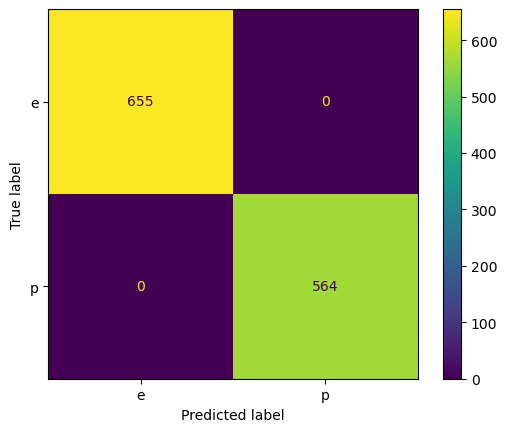

In [29]:
# plot the confusion matirx
ConfusionMatrixDisplay.from_estimator(GridSearch_GradientBoost_Model,X_test,y_test)

In [30]:
# compare the prediction to the truth label
print(classification_report(y_test, GridSearch_GradientBoost_Model_Prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [32]:
# view the relevance of each feature importance
GridSearch_GradientBoost_Model.best_estimator_.feature_importances_

array([2.91150176e-04, 1.79147868e-16, 0.00000000e+00, 0.00000000e+00,
       9.21950419e-17, 1.04652037e-03, 1.18312069e-05, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 9.21056344e-18, 0.00000000e+00,
       4.54101073e-17, 0.00000000e+00, 0.00000000e+00, 6.04605717e-05,
       2.42084559e-03, 5.14924369e-02, 1.84253604e-04, 1.39418582e-02,
       1.82499853e-02, 3.52528483e-03, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 1.39069900e-18, 1.25092906e-02,
       1.09449796e-02, 0.00000000e+00, 1.47089523e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92014933e-17,
       3.86955741e-18, 0.00000000e+00, 1.87255536e-17, 0.00000000e+00,
       4.39922283e-04, 5.50350499e-04, 1.35970145e-01, 4.69032068e-03,
       1.34140594e-02, 4.65375385e-04, 2.54703069e-03, 4.95063766e-06,
       0.00000000e+00, 1.71847760e-06, 5.59103031e-02, 2.44718055e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [33]:
feature_dataframe = pd.DataFrame(index=X.columns, data=GridSearch_GradientBoost_Model.best_estimator_.feature_importances_, columns=['Importance'])

In [34]:
feature_dataframe

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.791479e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.219504e-17
...,...
habitat_l,0.000000e+00
habitat_m,9.718617e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [38]:
important_features = feature_dataframe[feature_dataframe['Importance']>0.0005]

In [39]:
important_features

,Importance
cap-surface_g,0.001047
cap-color_y,0.002421
bruises_t,0.051492
odor_f,0.013942
odor_l,0.018250
odor_m,0.003525
odor_n,0.614744
odor_p,0.003949
gill-spacing_w,0.012509
gill-size_n,0.010945


<Axes: ylabel='Importance'>

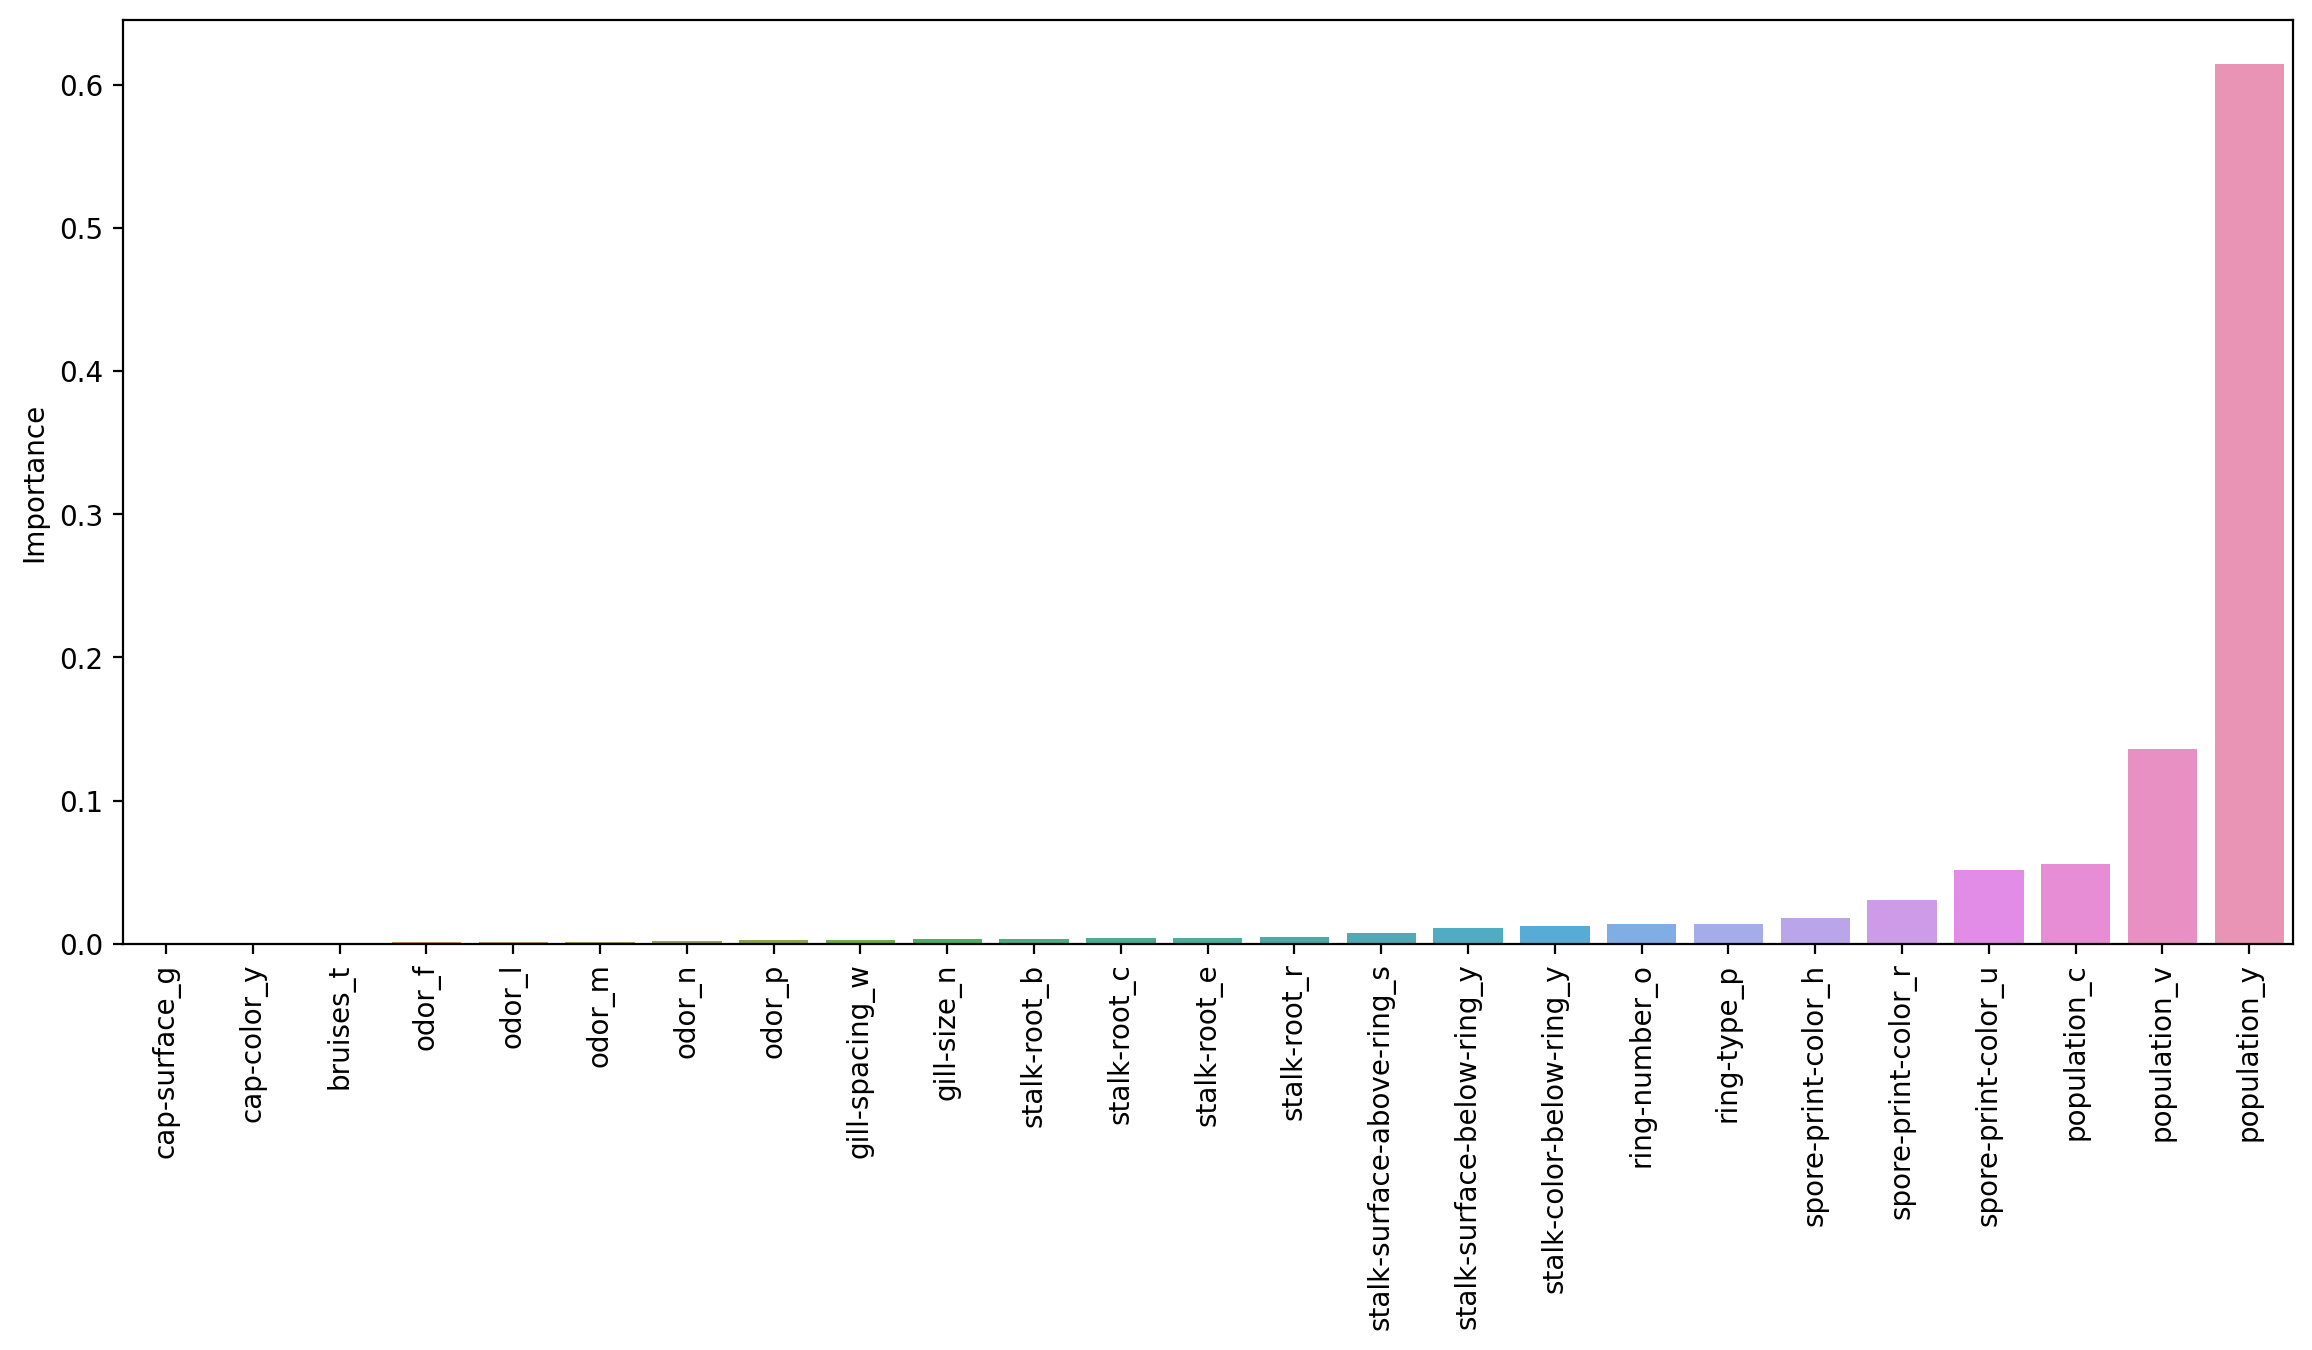

In [40]:
plt.figure(figsize=(14,6), dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=important_features.sort_values('Importance'), x=important_features.index, y='Importance')